### Main research question
1) Main research question: 
    What are the relationships between specific Alzheimer's disease biomarkers and cognitive decline in the dataset, including positive or negative correlations?
    For statistical purposes we will assume that the null hypothesis is the following; There are no associated positive correlations or negative between the chosen biomarkers and cognitive decline indicators.  Initially will conduct the analysis for each biomarker meaning there will be multiple sub null hypotheses that will be either rejected or accepted depending on the P values. 

### Sub research questions with themes 
1. Dataset stratification on core datasets (sea-ad_cohort_mtg-tissue_extractions-luminex_data and sea-ad_cohort_donor_metadata_072524)
    a) Are the four Alzheimer’s disease biomarkers sufficiently distinct to enable robust statistical analysis, as evidenced by principal component analysis (PCA) retaining a significant proportion of total variance (e.g., ≥70%) and facilitating k-means clustering to identify separable patient subgroups with potential cognitive decline trajectories?
    b) Do biomarker distributions significantly differ between demented and non-demented groups when analyzed using the Mann-Whitney U test, providing a non-parametric validation of the PCA and clustering results?

2. Correlational analysis.
    a) Do individual Alzheimer’s disease biomarkers (ABeta40, ABeta42, tTAU, pTAU) extracted using RIPA and GuHCl buffer methods exhibit statistically significant correlations with cognitive decline?
    b) Do these biomarkers also show significant correlations with MMSE test scores?
    c) 
























### Extra details for improved notebook clarity
For this notebook the sign of a correlation (positive or negative) is meaningful only in the context of the variables analyzed. For example, a Pearson correlation between ABeta42 (pg/ug.1) and a given variable yields r = 0.3693 with p = 0.0005, leading to rejection of the null hypothesis (p < 0.001, strong evidence). Conversely, a Spearman correlation for ABeta42 (pg/ug.1) produces tau = –0.2475 with p = 0.0017, also rejecting the null hypothesis (p < 0.01, strong evidence). These opposing signs are consistent when considering the variables’ scales—specifically, MMSE scores range from 30 (no impairment) to 0 (severe cognitive impairment). 
Additionally different metrics of cognitive decline like MMSE are used to measure the symptom of dementia (which is tightly related to Alzheimers disease as the core symptom) meaning they 
measure the same symptom but in different manners. 

## Step 1 Data evalutation
Evaluating whether the data is suitable for statistical analysis with enough diversity. 
### Substeps:
1. **Understanding data analysis feasiblity via principal component analysis (needed due to biomarker count which makes dimensionality = 8) and k means clustering** 
2. **Understanding whether a signfiicant difference between demented and non demented people exists  in the data (understanding data feasibliy via a second method if 1) fails)**

In [ ]:
#### STEP 1 : Understanding data analysis feasiblity via principal component analysis (needed due to biomarker count which makes dimensionality = 8) and k means clustering

# Importing the neeeded libraries for the project 
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

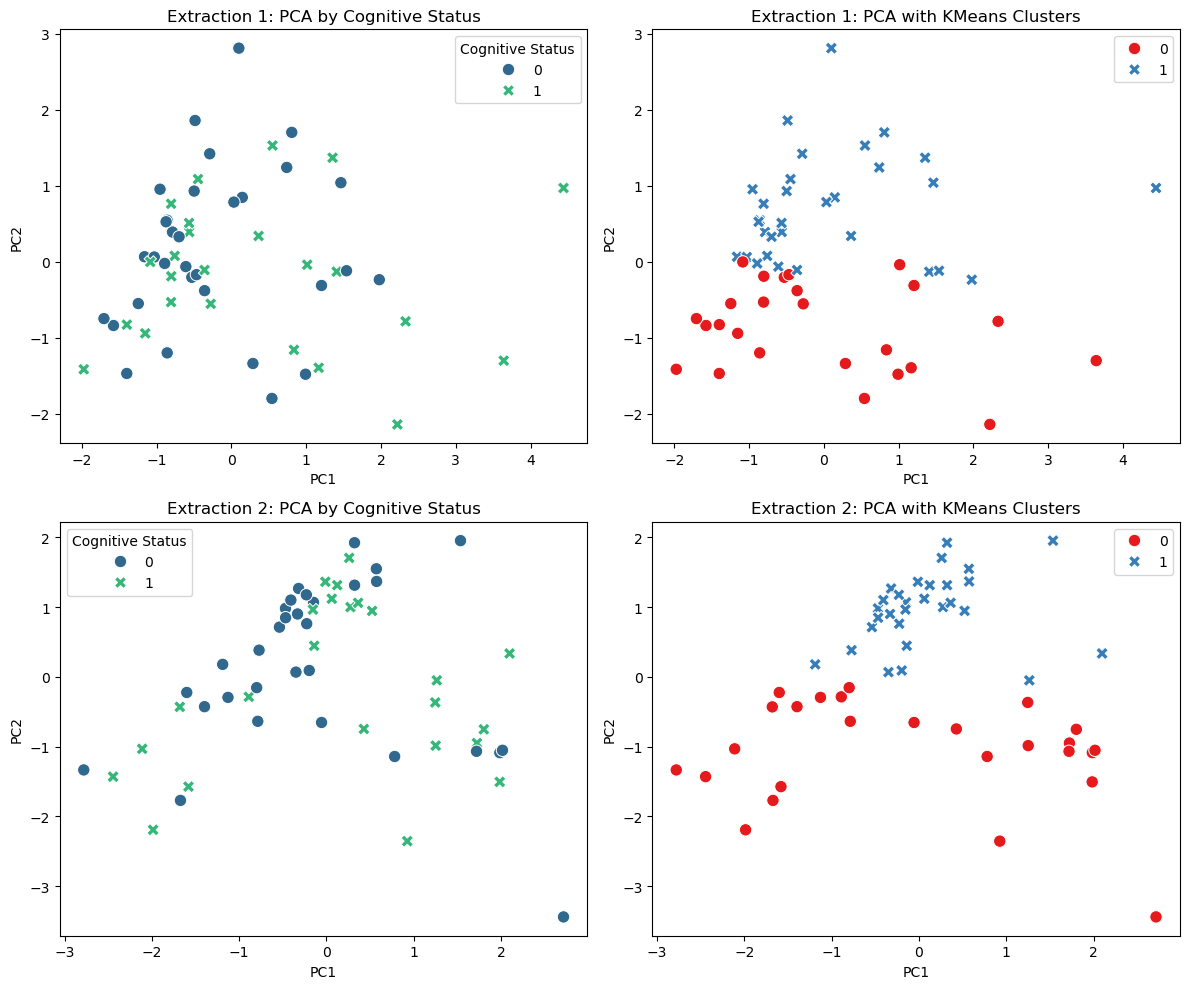

In [ ]:
# CODE 1: PCA and k-means clustering using Cognitive Status solely as a visualization label
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load and merge datasets 
metadata_dementia = pd.read_excel("./data/sea-ad_cohort_donor_metadata_072524 (1).xlsx")
markers = pd.read_excel("./data/sea-ad_cohort_mtg-tissue_extractions-luminex_data (1).xlsx", header=1)
markers_metadata = markers.merge(metadata_dementia, on="Donor ID", how="inner")

# Define biomarker column sets
biomarker_cols_extr1 = ["ABeta40 pg/ug", "ABeta42 pg/ug", "tTAU pg/ug", "pTAU pg/ug"]
biomarker_cols_extr2 = ["ABeta40 pg/ug.1", "ABeta42 pg/ug.1", "tTAU pg/ug.1", "pTAU pg/ug.1"]

# Extraction 1)
data_clean_extr1 = markers_metadata.dropna(subset=biomarker_cols_extr1)
quantiles_extr1 = {col: data_clean_extr1[col].quantile(0.90) for col in biomarker_cols_extr1}
data_clean_extr1 = data_clean_extr1[(data_clean_extr1[biomarker_cols_extr1] < pd.Series(quantiles_extr1)).all(axis=1)]
scaler_extr1 = StandardScaler()
X_extr1 = scaler_extr1.fit_transform(data_clean_extr1[biomarker_cols_extr1])

# PCA computed only on biomarker features, target (Cognitive Status) is used only in visualization.
pca_extr1 = PCA(n_components=2)
X_pca_extr1 = pca_extr1.fit_transform(X_extr1)
cog_status_extr1 = data_clean_extr1["Cognitive Status"].apply(lambda x: 1 if x == "Dementia" else 0)
kmeans_extr1 = KMeans(n_clusters=2, random_state=42)
clusters_extr1 = kmeans_extr1.fit_predict(X_extr1)

# Extraction 2) 
data_clean_extr2 = markers_metadata.dropna(subset=biomarker_cols_extr2)
quantiles_extr2 = {col: data_clean_extr2[col].quantile(0.90) for col in biomarker_cols_extr2}
data_clean_extr2 = data_clean_extr2[(data_clean_extr2[biomarker_cols_extr2] < pd.Series(quantiles_extr2)).all(axis=1)]
scaler_extr2 = StandardScaler()
X_extr2 = scaler_extr2.fit_transform(data_clean_extr2[biomarker_cols_extr2])
pca_extr2 = PCA(n_components=2)
X_pca_extr2 = pca_extr2.fit_transform(X_extr2)
cog_status_extr2 = data_clean_extr2["Cognitive Status"].apply(lambda x: 1 if x == "Dementia" else 0)
kmeans_extr2 = KMeans(n_clusters=2, random_state=42)
clusters_extr2 = kmeans_extr2.fit_predict(X_extr2)

# Plotting 3) 
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Extraction 1: PCA colored by Cognitive Status (visual) 
sns.scatterplot(x=X_pca_extr1[:, 0], y=X_pca_extr1[:, 1],
                hue=cog_status_extr1, palette="viridis", style=cog_status_extr1, s=80, ax=axs[0, 0])
axs[0, 0].set_title("Extraction 1: PCA by Cognitive Status")
axs[0, 0].set_xlabel("PC1")
axs[0, 0].set_ylabel("PC2")

# Extraction 1: PCA colored by k-means clusters
sns.scatterplot(x=X_pca_extr1[:, 0], y=X_pca_extr1[:, 1],
                hue=clusters_extr1, palette="Set1", style=clusters_extr1, s=80, ax=axs[0, 1])
axs[0, 1].set_title("Extraction 1: PCA with KMeans Clusters")
axs[0, 1].set_xlabel("PC1")
axs[0, 1].set_ylabel("PC2")

# Extraction 2: PCA colored by Cognitive Status
sns.scatterplot(x=X_pca_extr2[:, 0], y=X_pca_extr2[:, 1],
                hue=cog_status_extr2, palette="viridis", style=cog_status_extr2, s=80, ax=axs[1, 0])
axs[1, 0].set_title("Extraction 2: PCA by Cognitive Status")
axs[1, 0].set_xlabel("PC1")
axs[1, 0].set_ylabel("PC2")

# Extraction 2: PCA colored by k-means clusters
sns.scatterplot(x=X_pca_extr2[:, 0], y=X_pca_extr2[:, 1],
                hue=clusters_extr2, palette="Set1", style=clusters_extr2, s=80, ax=axs[1, 1])
axs[1, 1].set_title("Extraction 2: PCA with KMeans Clusters")
axs[1, 1].set_xlabel("PC1")
axs[1, 1].set_ylabel("PC2")

plt.tight_layout()
plt.show()


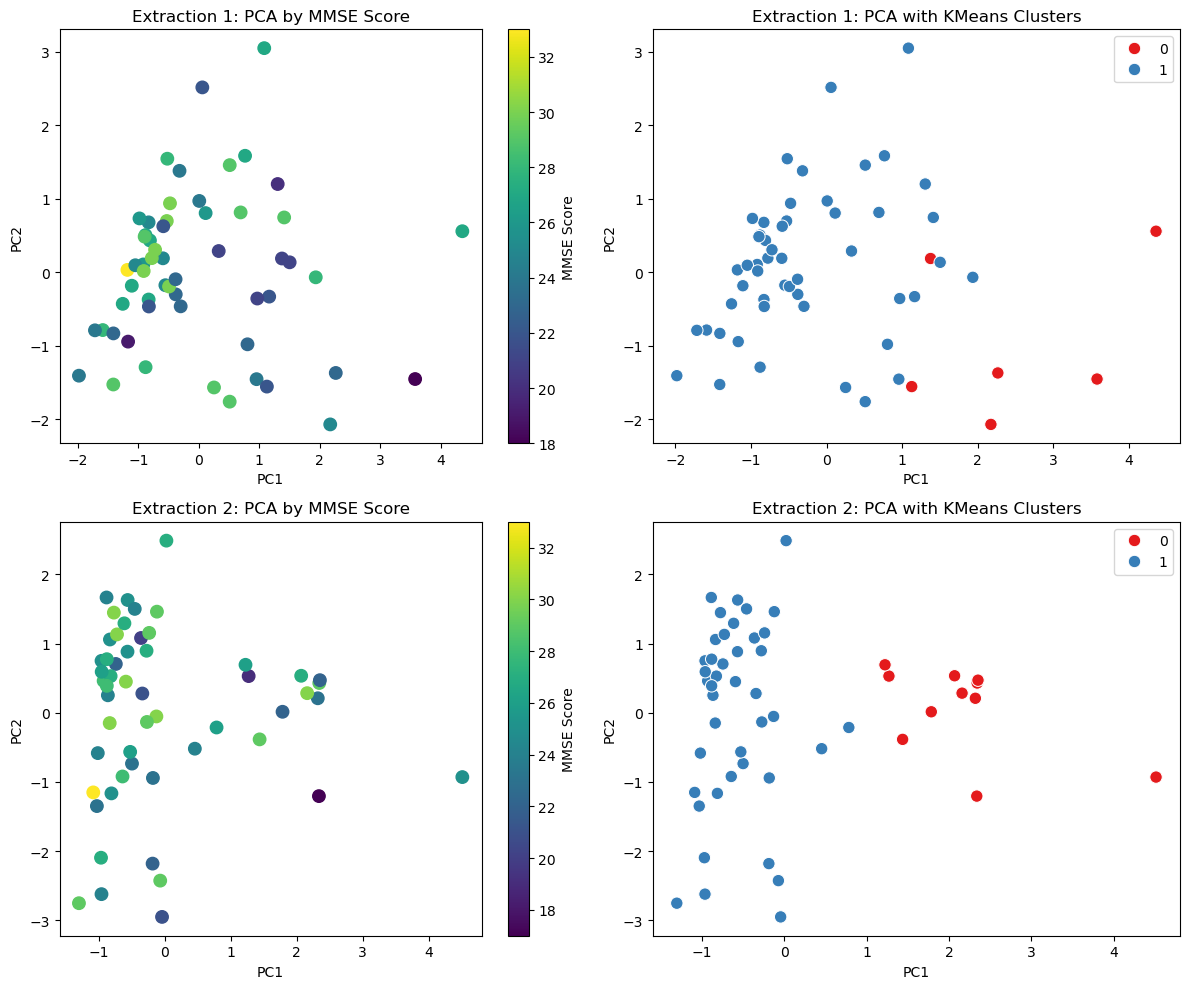

In [88]:
# CODE 2: PCA and k-means clustering using MMSE Score only for visuals 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Extraction 1)
# Drop rows missing any biomarker or MMSE value 
data_clean_extr1 = markers_metadata.dropna(subset=biomarker_cols_extr1 + ["Last MMSE Score"])
quantiles_extr1 = {col: data_clean_extr1[col].quantile(0.90) for col in biomarker_cols_extr1}
data_clean_extr1 = data_clean_extr1[(data_clean_extr1[biomarker_cols_extr1] < pd.Series(quantiles_extr1)).all(axis=1)]
scaler_extr1 = StandardScaler()
X_extr1 = scaler_extr1.fit_transform(data_clean_extr1[biomarker_cols_extr1])
# PCA computed only on biomarkers 
pca_extr1 = PCA(n_components=2)
X_pca_extr1 = pca_extr1.fit_transform(X_extr1)
mmse_extr1 = data_clean_extr1["Last MMSE Score"].astype(float)
kmeans_extr1 = KMeans(n_clusters=2, random_state=42)
clusters_extr1 = kmeans_extr1.fit_predict(X_extr1)

# Extraction 2)
data_clean_extr2 = markers_metadata.dropna(subset=biomarker_cols_extr2 + ["Last MMSE Score"])
quantiles_extr2 = {col: data_clean_extr2[col].quantile(0.90) for col in biomarker_cols_extr2}
data_clean_extr2 = data_clean_extr2[(data_clean_extr2[biomarker_cols_extr2] < pd.Series(quantiles_extr2)).all(axis=1)]
scaler_extr2 = StandardScaler()
X_extr2 = scaler_extr2.fit_transform(data_clean_extr2[biomarker_cols_extr2])
pca_extr2 = PCA(n_components=2)
X_pca_extr2 = pca_extr2.fit_transform(X_extr2)
mmse_extr2 = data_clean_extr2["Last MMSE Score"].astype(float)
kmeans_extr2 = KMeans(n_clusters=2, random_state=42)
clusters_extr2 = kmeans_extr2.fit_predict(X_extr2)

# Plotting 3) 
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Extraction 1: PCA colored by MMSE Score
sc1 = axs[0, 0].scatter(X_pca_extr1[:, 0], X_pca_extr1[:, 1],
                        c=mmse_extr1, cmap="viridis", s=80)
axs[0, 0].set_title("Extraction 1: PCA by MMSE Score")
axs[0, 0].set_xlabel("PC1")
axs[0, 0].set_ylabel("PC2")
fig.colorbar(sc1, ax=axs[0, 0], label="MMSE Score")

# Extraction 1: PCA colored by k-means clusters
sns.scatterplot(x=X_pca_extr1[:, 0], y=X_pca_extr1[:, 1],
                hue=clusters_extr1, palette="Set1", s=80, ax=axs[0, 1])
axs[0, 1].set_title("Extraction 1: PCA with KMeans Clusters")
axs[0, 1].set_xlabel("PC1")
axs[0, 1].set_ylabel("PC2")

# Extraction 2: PCA colored by MMSE Score
sc2 = axs[1, 0].scatter(X_pca_extr2[:, 0], X_pca_extr2[:, 1],
                        c=mmse_extr2, cmap="viridis", s=80)
axs[1, 0].set_title("Extraction 2: PCA by MMSE Score")
axs[1, 0].set_xlabel("PC1")
axs[1, 0].set_ylabel("PC2")
fig.colorbar(sc2, ax=axs[1, 0], label="MMSE Score")

# Extraction 2: PCA colored by k-means clusters
sns.scatterplot(x=X_pca_extr2[:, 0], y=X_pca_extr2[:, 1],
                hue=clusters_extr2, palette="Set1", s=80, ax=axs[1, 1])
axs[1, 1].set_title("Extraction 2: PCA with KMeans Clusters")
axs[1, 1].set_xlabel("PC1")
axs[1, 1].set_ylabel("PC2")

plt.tight_layout()
plt.show()


In [101]:
has_dementia = markers_metadata["Cognitive Status"] == "Dementia"
group_with_dementia = markers_metadata[has_dementia]
group_without_dementia = markers_metadata[~has_dementia]


biomarker_cols_extr1 = ["ABeta40 pg/ug", "ABeta42 pg/ug", "tTAU pg/ug", "pTAU pg/ug"]
biomarker_cols_extr2 = ["ABeta40 pg/ug.1", "ABeta42 pg/ug.1", "tTAU pg/ug.1", "pTAU pg/ug.1"]

# Combine both biomarker lists
biomarkers = biomarker_cols_extr1 + biomarker_cols_extr2

# Significance threshold for P value (alpha)
alpha = 0.05

# Compute Mann–Whitney U test for each biomarker 
results = []
for biomarker in biomarkers:
    # Missing value handling 
    data_with = group_with_dementia[biomarker].dropna()
    data_without = group_without_dementia[biomarker].dropna()
    stat, p_value = stats.mannwhitneyu(data_with, data_without, alternative="two-sided")
    results.append((biomarker, stat, p_value))

# Sort biomarkers by ascending p-value (lowest p indicates strongest evidence of group difference)
results_sorted = sorted(results, key=lambda x: x[2])

# Results in a nice format
print("Biomarker\tU Statistic\tP-value\t\tDecision")
for biomarker, stat, p_value in results_sorted:
    decision = ("Reject null hypothesis: statistically significant difference"
                if p_value < alpha
                else "Fail to reject null hypothesis: insufficient evidence for a difference")
    print(f"{biomarker:20s}\t{stat:10.3f}\t{p_value:10.4f}\t-> {decision}")


Biomarker	U Statistic	P-value		Decision
ABeta40 pg/ug.1     	  1335.000	    0.0001	-> Reject null hypothesis: statistically significant difference
ABeta42 pg/ug.1     	  1321.000	    0.0001	-> Reject null hypothesis: statistically significant difference
ABeta40 pg/ug       	  1270.000	    0.0005	-> Reject null hypothesis: statistically significant difference
ABeta42 pg/ug       	  1223.000	    0.0023	-> Reject null hypothesis: statistically significant difference
tTAU pg/ug.1        	   642.000	    0.0321	-> Reject null hypothesis: statistically significant difference
pTAU pg/ug          	  1009.000	    0.2578	-> Fail to reject null hypothesis: insufficient evidence for a difference
tTAU pg/ug          	   780.000	    0.3639	-> Fail to reject null hypothesis: insufficient evidence for a difference
pTAU pg/ug.1        	   878.500	    0.9786	-> Fail to reject null hypothesis: insufficient evidence for a difference


## Step 2: Correlation Analysis

### Substeps:

1. **Main Group of Correlations 1: Correlating Single Variables with Cognitive Decline**  
   - Example: ABeta40 and cognitive decline, ABeta42 and cognitive decline, etc.  
   - **Variable Groups**:  
     - **RIPA Buffer Extraction**: ABeta40, ABeta42, tTAU, pTAU  
     - **GuHCl (Guanidine Hydrochloride) Buffer Tissue Extraction**: ABeta40, ABeta42, tTAU, pTAU  
   - **Total Correlations**: 8 (each variable correlated with cognitive decline)

2. **Main Group of Correlations 2: Correlating Single Variables with MMSE Test Scores**  
   - Example: ABeta40 and MMSE test scores, ABeta42 and MMSE test scores, etc.  
   - **Variable Groups**:  
     - **RIPA Buffer Extraction**: ABeta40, ABeta42, tTAU, pTAU (each correlated with MMSE test scores)  
     - **GuHCl (Guanidine Hydrochloride) Buffer Tissue Extraction**: ABeta40, ABeta42, tTAU, pTAU (each correlated with MMSE test scores)  
   - **Total Correlations**: 8 (each variable correlated with MMSE test scores)  
  
  3. 

In [92]:
### Data preparation and viewing 
### Merging of the datasets with correct patient ID filtering 
metadata_dementia = pd.read_excel("./data/sea-ad_cohort_donor_metadata_072524 (1).xlsx")
markers = pd.read_excel("./data/sea-ad_cohort_mtg-tissue_extractions-luminex_data (1).xlsx", header=1)
markers_metadata = markers.merge(metadata_dementia, on="Donor ID", how="inner")
markers_metadata

,Donor ID,ABeta40 pg/ug,ABeta42 pg/ug,tTAU pg/ug,pTAU pg/ug,ABeta40 pg/ug.1,ABeta42 pg/ug.1,tTAU pg/ug.1,pTAU pg/ug.1,Primary Study Name,...,CERAD score,Overall CAA Score,Highest Lewy Body Disease,Total Microinfarcts (not observed grossly),Total microinfarcts in screening sections,Atherosclerosis,Arteriolosclerosis,LATE,RIN,Severely Affected Donor
0,H20.33.045,981.444000,142.778000,1122.432229,5.415789,2179.336000,1737.483712,27.065263,2.638947,ADRC Clinical Core,...,Frequent,Not identified,Not Identified (olfactory bulb not assessed),4,4,Moderate,Severe,LATE Stage 2,8.15,NaN
1,H20.33.044,0.007088,0.245263,7005.543158,5.630526,0.203116,0.311579,109.728421,1.957895,ACT,...,Absent,Not identified,Not Identified (olfactory bulb not assessed),3,1,Mild,Moderate,LATE Stage 1,9.20,NaN
2,H21.33.045,21.423158,53.878947,147.565263,11.489474,46.231579,954.656984,14.405263,1.678947,ADRC Clinical Core,...,Frequent,Moderate,Limbic (Transitional),0,0,Moderate,Moderate,LATE Stage 3,6.55,Y
3,H20.33.046,25.295789,69.988421,283.436842,15.917895,46.929474,1103.876312,17.046316,2.871579,ACT,...,Frequent,Moderate,Not Identified (olfactory bulb not assessed),1,1,Moderate,Severe,LATE Stage 2,5.67,Y
4,H20.33.014,0.526168,16.137895,258.624211,3.398947,1.675758,97.642105,83.395789,1.680000,ADRC Clinical Core,...,Sparse,Mild,Olfactory bulb only,1,1,NaN,Mild,Not Identified,8.67,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,H21.33.039,1.450526,76.226316,704.801053,4.146316,2.818947,182.274737,74.063158,2.188421,ACT,...,Moderate,Not identified,Not Identified (olfactory bulb assessed),0,0,Mild,Mild,LATE Stage 3,7.20,Y
80,H21.33.040,0.065192,0.490526,894.136842,3.850526,0.071711,0.898947,141.738947,2.167368,ACT,...,Frequent,Moderate,Olfactory bulb only,3,1,Mild,Moderate,LATE Stage 1,7.37,NaN
81,H21.33.041,5.010526,88.169474,740.583158,3.327368,6.568421,340.077895,110.118947,1.825263,ACT,...,Absent,Not identified,Limbic (Transitional),2,2,Moderate,Severe,Not Identified,7.57,NaN
82,H21.33.042,20.538947,47.932632,531.651579,2.507368,51.310526,330.860000,129.435789,1.876842,ACT,...,Moderate,Moderate,Neocortical (Diffuse),2,0,Moderate,Moderate,LATE Stage 2,6.23,NaN


In [98]:
""""
    1) correlating single variables with single outcomes e.g. ABeta40 and cognitive decline , ABeta42 with cognitive decline and so on and so forth.
    (full list 1: ABeta40, ABeta42, tTAU ,pTAU in RIPA buffer extraction individually with cognitive decline ) 
    (full list 2: ABeta40, ABeta42, tTAU, pTAU in GuHCl (Guanidine Hydrochloride) Buffer Tissue extractions individually with cognitive decline) 
    (total of 8 correlations)
    Type of correlations: a point biserial correlation coefficient and the associated p-value (for hypothesis validation) due to nominal and continuous variables involved.
    The function we are using is two tailed meaning it can infer both negative and positive correaltion outputting the r coefficient, thus our main null hypothesis also has that feature
"""

# Define MMSE scores and prepare correlation tests
has_dementia = markers_metadata["Cognitive Status"] == "Dementia"
stat_tests = []

#Correlate for each mentioned variable
stat_tests.append(("ABeta40 pg/ug", stats.pointbiserialr(has_dementia, markers_metadata["ABeta40 pg/ug"])))
stat_tests.append(("ABeta40 pg/ug.1", stats.pointbiserialr(has_dementia, markers_metadata["ABeta40 pg/ug.1"]))) #.1 signifies the second buffer extraction method i.e. GuHCl (Guanidine Hydrochloride) Buffer Tissue extractions

stat_tests.append(("ABeta42 pg/ug", stats.pointbiserialr(has_dementia, markers_metadata["ABeta42 pg/ug"])))
stat_tests.append(("ABeta42 pg/ug.1", stats.pointbiserialr(has_dementia, markers_metadata["ABeta42 pg/ug.1"])))

stat_tests.append(("tTAU pg/ug", stats.pointbiserialr(has_dementia, markers_metadata["tTAU pg/ug"])))
stat_tests.append(("tTAU pg/ug.1", stats.pointbiserialr(has_dementia, markers_metadata["tTAU pg/ug.1"])))


stat_tests.append(("pTAU pg/ug", stats.pointbiserialr(has_dementia, markers_metadata["pTAU pg/ug"])))
stat_tests.append(("pTAU pg/ug.1", stats.pointbiserialr(has_dementia, markers_metadata["pTAU pg/ug.1"])))


# Sort tests by p-value in ascending order
stat_tests.sort(key=lambda x: x[1].pvalue)
alpha = 0.05  # significance level for p value

# Printing correlation with added result interpretation
for marker_name, stat_result in stat_tests:
    decision = ("Reject null hypothesis: evidence of a statistically significant correlation"
                if stat_result.pvalue < alpha 
                else "Fail to reject null hypothesis: insufficient evidence to infer a correlation")
    print(f"{marker_name}: r = {stat_result.statistic:.4f}, p = {stat_result.pvalue:.4f} -> {decision}")

ABeta42 pg/ug.1: r = 0.3693, p = 0.0005 -> Reject null hypothesis: evidence of a statistically significant correlation
ABeta40 pg/ug: r = 0.1923, p = 0.0796 -> Fail to reject null hypothesis: insufficient evidence to infer a correlation
ABeta42 pg/ug: r = 0.1893, p = 0.0846 -> Fail to reject null hypothesis: insufficient evidence to infer a correlation
ABeta40 pg/ug.1: r = 0.1861, p = 0.0902 -> Fail to reject null hypothesis: insufficient evidence to infer a correlation
pTAU pg/ug: r = 0.1752, p = 0.1110 -> Fail to reject null hypothesis: insufficient evidence to infer a correlation
tTAU pg/ug.1: r = -0.1653, p = 0.1330 -> Fail to reject null hypothesis: insufficient evidence to infer a correlation
tTAU pg/ug: r = -0.1221, p = 0.2685 -> Fail to reject null hypothesis: insufficient evidence to infer a correlation
pTAU pg/ug.1: r = -0.0660, p = 0.5507 -> Fail to reject null hypothesis: insufficient evidence to infer a correlation


In [97]:
""""
    1) correlating single variables with single outcomes e.g. ABeta40 and MMSE test scores , ABeta42 with MMSE test scores and so on and so forth.
    (full list 1: ABeta40, ABeta42, tTAU ,pTAU in RIPA buffer extraction individually with MMSE test scores  ) 
    (full list 2: ABeta40, ABeta42, tTAU, pTAU in GuHCl (Guanidine Hydrochloride) Buffer Tissue extractions individually with MMSE test scores) 
    (total of 8 correlations)
    Type of correlations: a Kendall’s tau correlation with the TAU statistic and the associated p-value (for hypothesis validation) due to continuous and categorical variables involved.
    We chose this type of correlation due to the nominal and continuous variables involved. 
    The function we are using is two tailed meaning it can infer both negative and positive correaltion outputting the r coefficient, thus our main null hypothesis also has that feature
"""

# Define MMSE scores and prepare correlation tests
MMSE = markers_metadata["Last MMSE Score"]
stat_tests_2 = []

# Applying Kendall's tau correlation for each biomarker versus MMSE (omitting NaNs)
stat_tests_2.append(("ABeta40 pg/ug", stats.kendalltau(MMSE, markers_metadata["ABeta40 pg/ug"], nan_policy="omit")))
stat_tests_2.append(("ABeta40 pg/ug.1", stats.kendalltau(MMSE, markers_metadata["ABeta40 pg/ug.1"], nan_policy="omit")))
stat_tests_2.append(("ABeta42 pg/ug", stats.kendalltau(MMSE, markers_metadata["ABeta42 pg/ug"], nan_policy="omit")))
stat_tests_2.append(("ABeta42 pg/ug.1", stats.kendalltau(MMSE, markers_metadata["ABeta42 pg/ug.1"], nan_policy="omit")))
stat_tests_2.append(("tTAU pg/ug", stats.kendalltau(MMSE, markers_metadata["tTAU pg/ug"], nan_policy="omit")))
stat_tests_2.append(("tTAU pg/ug.1", stats.kendalltau(MMSE, markers_metadata["tTAU pg/ug.1"], nan_policy="omit")))
stat_tests_2.append(("pTAU pg/ug", stats.kendalltau(MMSE, markers_metadata["pTAU pg/ug"], nan_policy="omit")))
stat_tests_2.append(("pTAU pg/ug.1", stats.kendalltau(MMSE, markers_metadata["pTAU pg/ug.1"], nan_policy="omit")))

# Sort tests by p-value in ascending order
stat_tests_2.sort(key=lambda x: x[1].pvalue)
alpha = 0.05  # significance level for p value 

# Print the correlation with added result interpretation
for marker_name, stat_result in stat_tests_2:
    decision = ("Reject null hypothesis: statistically significant correlation"
                if stat_result.pvalue < alpha
                else "Fail to reject null hypothesis: insufficient evidence to infer a correlation")
    print(f"{marker_name}: tau = {stat_result.correlation:.4f}, p = {stat_result.pvalue:.4f} -> {decision}")


ABeta42 pg/ug.1: tau = -0.2475, p = 0.0017 -> Reject null hypothesis: statistically significant correlation
ABeta40 pg/ug.1: tau = -0.2314, p = 0.0033 -> Reject null hypothesis: statistically significant correlation
ABeta40 pg/ug: tau = -0.2068, p = 0.0087 -> Reject null hypothesis: statistically significant correlation
pTAU pg/ug: tau = -0.2057, p = 0.0090 -> Reject null hypothesis: statistically significant correlation
ABeta42 pg/ug: tau = -0.1696, p = 0.0313 -> Reject null hypothesis: statistically significant correlation
tTAU pg/ug.1: tau = 0.1249, p = 0.1127 -> Fail to reject null hypothesis: insufficient evidence to infer a correlation
tTAU pg/ug: tau = 0.1058, p = 0.1789 -> Fail to reject null hypothesis: insufficient evidence to infer a correlation
pTAU pg/ug.1: tau = -0.0763, p = 0.3328 -> Fail to reject null hypothesis: insufficient evidence to infer a correlation
